# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_landmarks(frame, results)

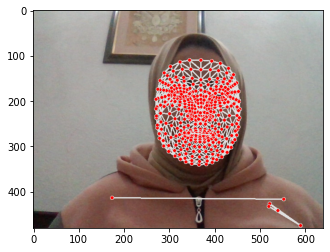

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.57525808,  0.58249927, -1.23832619, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
468*3+33*4+21*3+21*3

1662

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.57525808,  0.58249927, -1.23832619, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'good', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0, 'good': 1, 'iloveyou': 2}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(90, 30, 1662)

In [26]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(90, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [72]:
res = [0.1, 0.8, 0.1]

In [73]:
actions[np.argmax(res)]

'good'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 494ms/step - loss: 2.4747 - categorical_accuracy: 0.2682
Epoch 2/2000
3/3 [==============================] - 0s 82ms/step - loss: 21.7936 - categorical_accuracy: 0.2271
Epoch 3/2000
3/3 [==============================] - 0s 98ms/step - loss: 18.4498 - categorical_accuracy: 0.4246
Epoch 4/2000
3/3 [==============================] - 0s 95ms/step - loss: 43.7212 - categorical_accuracy: 0.3738
Epoch 5/2000
3/3 [==============================] - 0s 104ms/step - loss: 24.1414 - categorical_accuracy: 0.3092
Epoch 6/2000
3/3 [==============================] - 0s 119ms/step - loss: 9.6480 - categorical_accuracy: 0.3405
Epoch 7/2000
3/3 [==============================] - 0s 108ms/step - loss: 19.9473 - categorical_accuracy: 0.2916
Epoch 8/2000
3/3 [==============================] - 0s 110ms/step - loss: 13.1328 - categorical_accuracy: 0.3366
Epoch 9/2000
3/3 [==============================] - 0s 105ms/step - loss: 14.4233 - categorical_accur

3/3 [==============================] - 0s 97ms/step - loss: 683.5753 - categorical_accuracy: 0.3053
Epoch 74/2000
3/3 [==============================] - 0s 99ms/step - loss: 290.6388 - categorical_accuracy: 0.3033
Epoch 75/2000
3/3 [==============================] - 0s 96ms/step - loss: 615.7943 - categorical_accuracy: 0.2876
Epoch 76/2000
3/3 [==============================] - 0s 99ms/step - loss: 486.0187 - categorical_accuracy: 0.3326
Epoch 77/2000
3/3 [==============================] - 0s 97ms/step - loss: 621.2336 - categorical_accuracy: 0.3288
Epoch 78/2000
3/3 [==============================] - 0s 71ms/step - loss: 530.3026 - categorical_accuracy: 0.3053
Epoch 79/2000
3/3 [==============================] - 0s 69ms/step - loss: 391.3102 - categorical_accuracy: 0.3425
Epoch 80/2000
3/3 [==============================] - 0s 69ms/step - loss: 220.1023 - categorical_accuracy: 0.3072
Epoch 81/2000
3/3 [==============================] - 0s 69ms/step - loss: 363.1190 - categorical_accur

3/3 [==============================] - 0s 102ms/step - loss: 76.9881 - categorical_accuracy: 0.3347
Epoch 216/2000
3/3 [==============================] - 0s 101ms/step - loss: 52.3830 - categorical_accuracy: 0.3190
Epoch 217/2000
3/3 [==============================] - 0s 99ms/step - loss: 48.3715 - categorical_accuracy: 0.4070
Epoch 218/2000
3/3 [==============================] - 0s 105ms/step - loss: 46.9480 - categorical_accuracy: 0.3131
Epoch 219/2000
3/3 [==============================] - 0s 103ms/step - loss: 52.5477 - categorical_accuracy: 0.3112
Epoch 220/2000
3/3 [==============================] - 0s 97ms/step - loss: 38.1081 - categorical_accuracy: 0.3288
Epoch 221/2000
3/3 [==============================] - 0s 108ms/step - loss: 36.4396 - categorical_accuracy: 0.2974
Epoch 222/2000
3/3 [==============================] - 0s 102ms/step - loss: 34.3736 - categorical_accuracy: 0.2133
Epoch 223/2000
3/3 [==============================] - 0s 96ms/step - loss: 23.3694 - categorical_

3/3 [==============================] - 0s 102ms/step - loss: 16.3281 - categorical_accuracy: 0.2779
Epoch 358/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.6155 - categorical_accuracy: 0.4266
Epoch 359/2000
3/3 [==============================] - 0s 96ms/step - loss: 11.3513 - categorical_accuracy: 0.2858
Epoch 360/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.8880 - categorical_accuracy: 0.3816
Epoch 361/2000
3/3 [==============================] - 0s 95ms/step - loss: 21.0879 - categorical_accuracy: 0.3561
Epoch 362/2000
3/3 [==============================] - 0s 97ms/step - loss: 20.6794 - categorical_accuracy: 0.3503
Epoch 363/2000
3/3 [==============================] - 0s 96ms/step - loss: 37.2356 - categorical_accuracy: 0.3288
Epoch 364/2000
3/3 [==============================] - 0s 94ms/step - loss: 32.1434 - categorical_accuracy: 0.2466
Epoch 365/2000
3/3 [==============================] - 0s 96ms/step - loss: 43.4222 - categorical_accura

3/3 [==============================] - 0s 98ms/step - loss: 9.2975 - categorical_accuracy: 0.4423
Epoch 500/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.5167 - categorical_accuracy: 0.3738
Epoch 501/2000
3/3 [==============================] - 0s 100ms/step - loss: 9.5691 - categorical_accuracy: 0.2408
Epoch 502/2000
3/3 [==============================] - 0s 98ms/step - loss: 9.8834 - categorical_accuracy: 0.2662
Epoch 503/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.8897 - categorical_accuracy: 0.3347
Epoch 504/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.6816 - categorical_accuracy: 0.2564
Epoch 505/2000
3/3 [==============================] - 0s 96ms/step - loss: 12.0252 - categorical_accuracy: 0.3151
Epoch 506/2000
3/3 [==============================] - 0s 94ms/step - loss: 9.6193 - categorical_accuracy: 0.3034
Epoch 507/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.2220 - categorical_accuracy: 0.4

3/3 [==============================] - 0s 97ms/step - loss: 10.9324 - categorical_accuracy: 0.3757
Epoch 572/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.9998 - categorical_accuracy: 0.4168
Epoch 573/2000
3/3 [==============================] - 0s 96ms/step - loss: 19.3193 - categorical_accuracy: 0.3737
Epoch 574/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.6991 - categorical_accuracy: 0.4090
Epoch 575/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.0849 - categorical_accuracy: 0.4520
Epoch 576/2000
3/3 [==============================] - 0s 99ms/step - loss: 11.6495 - categorical_accuracy: 0.2896
Epoch 577/2000
3/3 [==============================] - 0s 100ms/step - loss: 12.2300 - categorical_accuracy: 0.3620
Epoch 578/2000
3/3 [==============================] - 0s 101ms/step - loss: 13.5576 - categorical_accuracy: 0.3777
Epoch 579/2000
3/3 [==============================] - 0s 106ms/step - loss: 28.6867 - categorical_accur

3/3 [==============================] - 0s 95ms/step - loss: 9.5942 - categorical_accuracy: 0.3699
Epoch 644/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.9440 - categorical_accuracy: 0.4619
Epoch 645/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.3588 - categorical_accuracy: 0.4325
Epoch 646/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.5660 - categorical_accuracy: 0.4070
Epoch 647/2000
3/3 [==============================] - 0s 99ms/step - loss: 8.0319 - categorical_accuracy: 0.3894
Epoch 648/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.1963 - categorical_accuracy: 0.3170
Epoch 649/2000
3/3 [==============================] - 0s 102ms/step - loss: 6.6805 - categorical_accuracy: 0.3992
Epoch 650/2000
3/3 [==============================] - 0s 99ms/step - loss: 6.7159 - categorical_accuracy: 0.3757
Epoch 651/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.7329 - categorical_accuracy: 0.48

3/3 [==============================] - 0s 106ms/step - loss: 8.7210 - categorical_accuracy: 0.3639
Epoch 788/2000
3/3 [==============================] - 0s 101ms/step - loss: 13.2589 - categorical_accuracy: 0.2936
Epoch 789/2000
3/3 [==============================] - 0s 106ms/step - loss: 26.4308 - categorical_accuracy: 0.3738
Epoch 790/2000
3/3 [==============================] - 0s 120ms/step - loss: 12.1812 - categorical_accuracy: 0.3190
Epoch 791/2000
3/3 [==============================] - 0s 100ms/step - loss: 16.4566 - categorical_accuracy: 0.3366
Epoch 792/2000
3/3 [==============================] - 0s 105ms/step - loss: 12.6325 - categorical_accuracy: 0.3874
Epoch 793/2000
3/3 [==============================] - 0s 102ms/step - loss: 17.1747 - categorical_accuracy: 0.3249
Epoch 794/2000
3/3 [==============================] - 0s 95ms/step - loss: 16.6743 - categorical_accuracy: 0.3582
Epoch 795/2000
3/3 [==============================] - 0s 97ms/step - loss: 16.2834 - categorical_

3/3 [==============================] - 0s 114ms/step - loss: 13.1195 - categorical_accuracy: 0.3698
Epoch 860/2000
3/3 [==============================] - 0s 112ms/step - loss: 14.3630 - categorical_accuracy: 0.2779
Epoch 861/2000
3/3 [==============================] - 0s 103ms/step - loss: 11.3404 - categorical_accuracy: 0.3249
Epoch 862/2000
3/3 [==============================] - 0s 119ms/step - loss: 9.5252 - categorical_accuracy: 0.3229
Epoch 863/2000
3/3 [==============================] - 0s 131ms/step - loss: 8.4430 - categorical_accuracy: 0.3777
Epoch 864/2000
3/3 [==============================] - 0s 105ms/step - loss: 6.8707 - categorical_accuracy: 0.3405
Epoch 865/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.1294 - categorical_accuracy: 0.3347
Epoch 866/2000
3/3 [==============================] - 0s 110ms/step - loss: 4.0217 - categorical_accuracy: 0.3659
Epoch 867/2000
3/3 [==============================] - 0s 97ms/step - loss: 6.0756 - categorical_accu

3/3 [==============================] - 0s 95ms/step - loss: 4.1711 - categorical_accuracy: 0.3562
Epoch 932/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.3445 - categorical_accuracy: 0.4188
Epoch 933/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.5830 - categorical_accuracy: 0.3405
Epoch 934/2000
3/3 [==============================] - 0s 103ms/step - loss: 15.4333 - categorical_accuracy: 0.3092
Epoch 935/2000
3/3 [==============================] - 0s 103ms/step - loss: 16.9543 - categorical_accuracy: 0.3581
Epoch 936/2000
3/3 [==============================] - 0s 107ms/step - loss: 8.2575 - categorical_accuracy: 0.3464
Epoch 937/2000
3/3 [==============================] - 0s 103ms/step - loss: 8.3321 - categorical_accuracy: 0.3679
Epoch 938/2000
3/3 [==============================] - 0s 100ms/step - loss: 5.5990 - categorical_accuracy: 0.4286
Epoch 939/2000
3/3 [==============================] - 0s 101ms/step - loss: 5.4550 - categorical_accurac

3/3 [==============================] - 0s 93ms/step - loss: 11.8563 - categorical_accuracy: 0.3757
Epoch 1004/2000
3/3 [==============================] - 0s 94ms/step - loss: 18.0242 - categorical_accuracy: 0.2955
Epoch 1005/2000
3/3 [==============================] - 0s 95ms/step - loss: 11.4731 - categorical_accuracy: 0.3699
Epoch 1006/2000
3/3 [==============================] - 0s 102ms/step - loss: 6.6508 - categorical_accuracy: 0.3483
Epoch 1007/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.4235 - categorical_accuracy: 0.2877
Epoch 1008/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.8774 - categorical_accuracy: 0.4149
Epoch 1009/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.5832 - categorical_accuracy: 0.3229
Epoch 1010/2000
3/3 [==============================] - 0s 102ms/step - loss: 4.7666 - categorical_accuracy: 0.3523
Epoch 1011/2000
3/3 [==============================] - 0s 98ms/step - loss: 3.6553 - categorical_ac

3/3 [==============================] - 0s 104ms/step - loss: 6.9681 - categorical_accuracy: 0.3112
Epoch 1146/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.4145 - categorical_accuracy: 0.3855
Epoch 1147/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.8344 - categorical_accuracy: 0.3503
Epoch 1148/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.6694 - categorical_accuracy: 0.3855
Epoch 1149/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.1415 - categorical_accuracy: 0.3796
Epoch 1150/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.0152 - categorical_accuracy: 0.4364
Epoch 1151/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.4230 - categorical_accuracy: 0.3992
Epoch 1152/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.8685 - categorical_accuracy: 0.3092
Epoch 1153/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.9993 - categorical_ac

3/3 [==============================] - 0s 96ms/step - loss: 3.3275 - categorical_accuracy: 0.3796
Epoch 1288/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.0367 - categorical_accuracy: 0.4852
Epoch 1289/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.9952 - categorical_accuracy: 0.3562
Epoch 1290/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.0607 - categorical_accuracy: 0.3465
Epoch 1291/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.4425 - categorical_accuracy: 0.3405
Epoch 1292/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.7395 - categorical_accuracy: 0.4403
Epoch 1293/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.4189 - categorical_accuracy: 0.4384
Epoch 1294/2000
3/3 [==============================] - 0s 106ms/step - loss: 3.3797 - categorical_accuracy: 0.3875
Epoch 1295/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.8000 - categorical_a

3/3 [==============================] - 0s 112ms/step - loss: 2.8516 - categorical_accuracy: 0.4775
Epoch 1430/2000
3/3 [==============================] - 0s 113ms/step - loss: 3.9105 - categorical_accuracy: 0.4012
Epoch 1431/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.0140 - categorical_accuracy: 0.4775
Epoch 1432/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.8635 - categorical_accuracy: 0.4403
Epoch 1433/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.2759 - categorical_accuracy: 0.4266
Epoch 1434/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.8004 - categorical_accuracy: 0.4755
Epoch 1435/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.3479 - categorical_accuracy: 0.4814
Epoch 1436/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.0228 - categorical_accuracy: 0.4227
Epoch 1437/2000
3/3 [==============================] - 0s 102ms/step - loss: 4.0979 - categorical

3/3 [==============================] - 0s 96ms/step - loss: 1.7234 - categorical_accuracy: 0.4872
Epoch 1572/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.5431 - categorical_accuracy: 0.3015
Epoch 1573/2000
3/3 [==============================] - 0s 102ms/step - loss: 4.8358 - categorical_accuracy: 0.4501
Epoch 1574/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.8737 - categorical_accuracy: 0.2974
Epoch 1575/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.7105 - categorical_accuracy: 0.5087
Epoch 1576/2000
3/3 [==============================] - 0s 104ms/step - loss: 4.1441 - categorical_accuracy: 0.3991
Epoch 1577/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.3585 - categorical_accuracy: 0.5029
Epoch 1578/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.1754 - categorical_accuracy: 0.4266
Epoch 1579/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.6436 - categorical_accu

3/3 [==============================] - 0s 97ms/step - loss: 1.6886 - categorical_accuracy: 0.4990
Epoch 1714/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.5590 - categorical_accuracy: 0.5127
Epoch 1715/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.5332 - categorical_accuracy: 0.5557
Epoch 1716/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.3049 - categorical_accuracy: 0.4090
Epoch 1717/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.1747 - categorical_accuracy: 0.4677
Epoch 1718/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.2348 - categorical_accuracy: 0.4540
Epoch 1719/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0866 - categorical_accuracy: 0.5616
Epoch 1720/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.2557 - categorical_accuracy: 0.3914
Epoch 1721/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.7447 - categorical_accura

3/3 [==============================] - 0s 106ms/step - loss: 0.9845 - categorical_accuracy: 0.5460
Epoch 1856/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.7894 - categorical_accuracy: 0.5263
Epoch 1857/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.1201 - categorical_accuracy: 0.4540
Epoch 1858/2000
3/3 [==============================] - 0s 107ms/step - loss: 3.4247 - categorical_accuracy: 0.4110
Epoch 1859/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.4257 - categorical_accuracy: 0.5186
Epoch 1860/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.2247 - categorical_accuracy: 0.5166
Epoch 1861/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.2156 - categorical_accuracy: 0.6124
Epoch 1862/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.6067 - categorical_accuracy: 0.3992
Epoch 1863/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.5914 - categorical

Epoch 1997/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.7280 - categorical_accuracy: 0.3953
Epoch 1998/2000
3/3 [==============================] - 0s 98ms/step - loss: 18.1652 - categorical_accuracy: 0.3620
Epoch 1999/2000
3/3 [==============================] - 0s 102ms/step - loss: 10.5622 - categorical_accuracy: 0.3738
Epoch 2000/2000
3/3 [==============================] - 0s 104ms/step - loss: 17.1097 - categorical_accuracy: 0.3425


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [87]:
res = model.predict(X_test)
print(X_test.shape)
print(res.shape)
print(frame.shape)


(5, 30, 1662)
(5, 3)
(480, 640, 3)


In [80]:
for num, prob in enumerate(res):
    print("num : "+str(num))
    print("prob : "+str(prob))
    #actions[np.argmax(res[4])]
    #actions[np.argmax(y_test[4]

num : 0
prob : 0.1
num : 1
prob : 0.8
num : 2
prob : 0.1


In [41]:
actions[np.argmax(res[4])]

'good'

In [42]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [61]:
model.save('action1.h5')

In [54]:
del model

In [43]:
model.load_weights('action1.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 0]],

       [[3, 0],
        [2, 0]],

       [[0, 4],
        [0, 1]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.2

# 11. Test in Real Time

In [104]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
 
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
def prob_viz(res, actions, input_frame, colors):
    
    output_frame = input_frame.copy()
    #res = model.predict(output_frame)
    for num, prob in enumerate(res):
        
        
        cv2.putText(output_frame, actions[num], org, font, fontScale, color, thickness, cv2.LINE_AA)
        
        
    return output_frame

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [107]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
4
hello
4
good
4
iloveyou
<class 'mediapipe.python.solution_base.Soluti

In [20]:
cap.release()
cv2.destroyAllWindows()

In [110]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.30874774, 0.30831486, 0.38293734]], dtype=float32)